In [25]:
import pandas as pd 
df = pd.read_csv('SampleData.csv')
df #original table

,0,1,-0.016,Unnamed: 3,Time (ms),CAP (mV)
0,0.00001,1,0.0055,NaN,0.00,-0.160
1,0.00002,1,-0.0245,NaN,0.01,0.055
2,0.00003,1,0.0145,NaN,0.02,-0.245
3,0.00004,1,-0.0320,NaN,0.03,0.145
4,0.00005,1,0.0200,NaN,0.04,-0.320
...,...,...,...,...,...,...
440,0.00441,1,-0.0080,NaN,4.40,0.215
441,0.00442,1,0.0205,NaN,4.41,-0.080
442,0.00443,1,-0.0065,NaN,4.42,0.205
443,0.00444,1,0.0165,NaN,4.43,-0.065


In [26]:
df.columns

Index(['0', '1', '-0.016', 'Unnamed: 3', 'Time (ms)', 'CAP (mV)'], dtype='object')

In [27]:
filtered_df = df.drop(columns=['0', '1', '-0.016', 'Unnamed: 3'])
filtered_df #the columns I need

,Time (ms),CAP (mV)
0,0.00,-0.160
1,0.01,0.055
2,0.02,-0.245
3,0.03,0.145
4,0.04,-0.320
...,...,...
440,4.40,0.215
441,4.41,-0.080
442,4.42,0.205
443,4.43,-0.065


# graph without labels

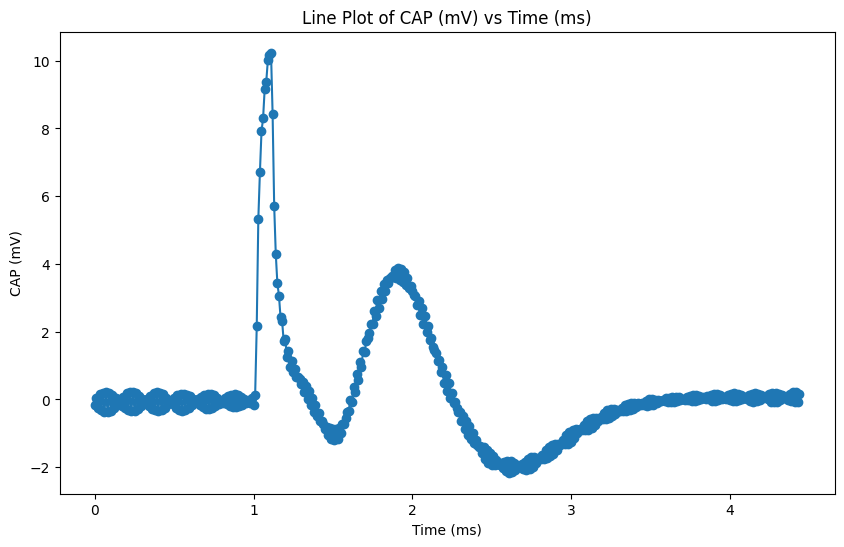

In [28]:
import matplotlib.pyplot as plt

# Plotting the data as a lineplot with 'Time (ms)' on the x-axis and 'CAP (mV)' on the y-axis
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(filtered_df['Time (ms)'], filtered_df['CAP (mV)'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Time (ms)')
plt.ylabel('CAP (mV)')
plt.title('Line Plot of CAP (mV) vs Time (ms)')

# Display the plot
plt.show()


# graph with labels

In [29]:
# Define ranges
initial_x_min, initial_x_max = 0.5, 1.5  # Range for max slope increase
peak_x_min, peak_x_max = 1.5, 2.5  # Range for CAP peak

# Filter data for maximum slope increase between 0.5 and 1.5 ms
df_slope_range = df[(df['Time (ms)'] >= initial_x_min) & (df['Time (ms)'] <= initial_x_max)].reset_index(drop=True)
df_slope_range['slope'] = df_slope_range['CAP (mV)'].diff() / df_slope_range['Time (ms)'].diff()
df_slope_range['slope_change'] = df_slope_range['slope'].diff()
max_slope_idx = df_slope_range[df_slope_range['slope_change'] > 0]['slope_change'].idxmax()
time_max_slope = df_slope_range.loc[max_slope_idx, 'Time (ms)']
CAP_max_slope = df_slope_range.loc[max_slope_idx, 'CAP (mV)']

# Filter data for the peak CAP value between 1.5 and 2.5 ms
df_peak_range = df[(df['Time (ms)'] >= peak_x_min) & (df['Time (ms)'] <= peak_x_max)]
max_cap_row = df_peak_range.loc[df_peak_range['CAP (mV)'].idxmax()]
time_max_cap = max_cap_row['Time (ms)']
CAP_max_cap = max_cap_row['CAP (mV)']

print(f"The highest point between {peak_x_min} ms and {peak_x_max} ms is at time {time_max_cap} ms with a CAP of {CAP_max_cap} mV.")

The highest point between 1.5 ms and 2.5 ms is at time 1.91 ms with a CAP of 3.88 mV.


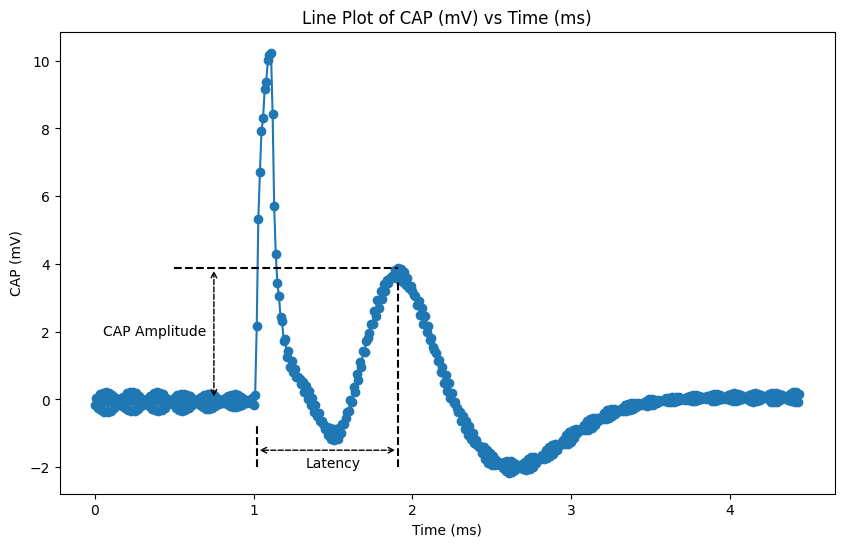

In [68]:
import matplotlib.pyplot as plt

# Plotting the data as a lineplot with 'Time (ms)' on the x-axis and 'CAP (mV)' on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Time (ms)'], filtered_df['CAP (mV)'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Time (ms)')
plt.ylabel('CAP (mV)')
plt.title('Line Plot of CAP (mV) vs Time (ms)')

# Drawing the arrows and annotations as in the provided image
# Arrow for CAP Amplitude
plt.annotate(
    '', xy=(0.75, CAP_max_cap), xytext=(0.75, 0), 
    arrowprops=dict(arrowstyle='<->', linestyle='--', color='black')
)
plt.text(0.05, 2, 'CAP Amplitude', verticalalignment='center')

# Arrow for Latency
plt.annotate(
    '', xy=(time_max_slope, -1.5), xytext=(time_max_cap , -1.5), 
    arrowprops=dict(arrowstyle='<->', linestyle='--', color='black')
)
plt.text(1.5, -2, 'Latency', horizontalalignment='center')

# Dashed lines to indicate the peak and latency
plt.vlines(time_max_slope, -2, -0.75, linestyles='dashed', colors='black') #vline: y, x1, x2
plt.hlines(CAP_max_cap, 0.5, time_max_cap, linestyles='dashed', colors='black') #hline: x, y1, y2
plt.vlines(time_max_cap, -2, CAP_max_cap - 0.4, linestyles='dashed', colors='black')

# Display the plot
plt.show()


## every variable renamed (easier to read through)

In [74]:
# Define ranges for detecting initial slope and CAP peak
initial_x_min, initial_x_max = 0.5, 1.5  # Range for max slope increase
peak_x_min, peak_x_max = 1.5, 2.5  # Range for CAP peak

# Filter data to find maximum slope increase between 0.5 and 1.5 ms
df_slope_range = df[(df['Time (ms)'] >= initial_x_min) & (df['Time (ms)'] <= initial_x_max)].reset_index(drop=True)
df_slope_range['slope'] = df_slope_range['CAP (mV)'].diff() / df_slope_range['Time (ms)'].diff()
df_slope_range['slope_change'] = df_slope_range['slope'].diff()
max_slope_idx = df_slope_range[df_slope_range['slope_change'] > 0]['slope_change'].idxmax()

#this is where latency x1 and y1 are calculated
latency_x1 = df_slope_range.loc[max_slope_idx, 'Time (ms)']
latency_y1 = df_slope_range.loc[max_slope_idx, 'CAP (mV)']

# Filter data to find the peak CAP value between 1.5 and 2.5 ms
df_peak_range = df[(df['Time (ms)'] >= peak_x_min) & (df['Time (ms)'] <= peak_x_max)]
max_cap_row = df_peak_range.loc[df_peak_range['CAP (mV)'].idxmax()]

#this is where latency x2 and CAP_amplitude_y2 are calculated
latency_x2 = max_cap_row['Time (ms)']
CAP_amplitude_y2 = max_cap_row['CAP (mV)']

print(f"The highest point between {peak_x_min} ms and {peak_x_max} ms is at time {latency_x2} ms with a CAP of {CAP_amplitude_y2} mV.")

The highest point between 1.5 ms and 2.5 ms is at time 1.91 ms with a CAP of 3.88 mV.


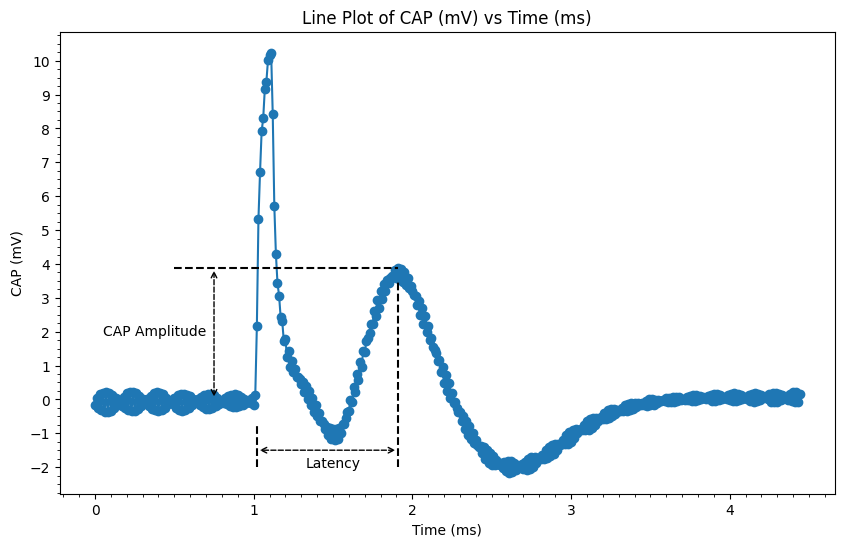

In [88]:

'''
# Step 1:  plotting initial scatterplot
'''

# Plotting the data as a line plot with 'Time (ms)' on the x-axis and 'CAP (mV)' on the y-axis
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) #graph size default
plt.plot(df['Time (ms)'], df['CAP (mV)'], marker='o', linestyle='-') #plotting scatterplot
#x axis is the column 'Time (ms)' and y axis is the column 'CAP (mV)'

# Adding labels and title
plt.xlabel('Time (ms)')
plt.ylabel('CAP (mV)')
plt.title('Line Plot of CAP (mV) vs Time (ms)')






'''
# Step 2: Drawing the CAP Amplitude arrow
'''
#the CAP amplitude arrow is drawn as the line between (x1, y1) and (x2, y2)

#defining values
CAP_amplitude_x1 = 0.75
CAP_amplitude_y1 = 0
CAP_amplitude_x2 = 0.75
#CAP_amplitude_y2 = enter_number

# CAP_amplitude_y2 is the y value of the peak at around 2 (calculated earlier) 

plt.annotate(
    '', xy=(CAP_amplitude_x1, CAP_amplitude_y1), xytext=(CAP_amplitude_x2, CAP_amplitude_y2), #essentially draws arrow between x1, y1 and x2, y2
    arrowprops=dict(arrowstyle='<->', linestyle='--', color='black')
)
plt.text(0.05, 2, 'CAP Amplitude', verticalalignment='center') # adjust the text coordinates so it is aligned







'''
# Step 3: drawing arrow for latency
'''
#the latency arrow is drawn as the line between (x1, y1) and (x2, y2)

#defining values
#latency_x1 = enter number
latency_y1 = -1.5
#latency_x2 = enter number
latency_y2 = -1.5

#latency_x1 is calculated as the x where the slope increases at around 1
#latency_x2 is calculated as the x where there is a peak at around 2

plt.annotate(
    '', xy=(latency_x1, latency_y1), xytext=(latency_x2, latency_y2), #essentially draws arrow between x1, y1 and x2, y2
    arrowprops=dict(arrowstyle='<->', linestyle='--', color='black')
)

plt.text(1.5, -2, 'Latency', horizontalalignment='center')  #this is the text by the arrow (you can adjust these coordinates (so the text is centered)








'''
# Step 4: adding dashed lines
'''
#note that there are 2 dashed lines to the right and left of latency, and one dashed line above CAP amplitude

#definng values
dotted_line_latency_right_y1 = -2
dotted_line_latency_right_y2 = -0.75

dotted_line_latency_left_y1 = -2
dotted_line_latency_left_y2 = CAP_amplitude_y2 - 0.4 #so it lands right below the peak

dotted_line_CAP_Amplitude_top_x1 = 0.5

#vertical lines: defined as x, y1, y2
plt.vlines(latency_x1, dotted_line_latency_right_y1, dotted_line_latency_right_y2, linestyles='dashed', colors='black')
plt.vlines(latency_x2, dotted_line_latency_left_y1, dotted_line_latency_left_y2, linestyles='dashed', colors='black')

#horizontal line: defined as y, x1, x2, 
plt.hlines(CAP_amplitude_y2, dotted_line_CAP_Amplitude_top_x1, latency_x2, linestyles='dashed', colors='black')

# Display the plot

'''
Step 5: set incriments (ignore everything except the column names)
'''
# Set x-axis ticks every 0.5 and major ticks every 0.1
plt.xticks(ticks=range(int(df['Time (ms)'].min()), int(df['Time (ms)'].max()) + 1, 1))  # Adjust according to your data
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Set y-axis ticks every 1 and major ticks every 0.25
plt.yticks(ticks=range(int(df['CAP (mV)'].min()), int(df['CAP (mV)'].max()) + 1, 1))  # Adjust according to your data
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.25))


plt.show()
